In [21]:

import pandas as pd
import plotnine as p9
from palmerpenguins import load_penguins
from plotnine import *
url = "https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2023/2023-03-21/languages.csv"
df = pd.read_csv(url)

scattered_df=df[["appeared","number_of_users","title"]]


scattered_df=scattered_df.dropna()

scattered_df=scattered_df[scattered_df['appeared']>1950]
#scattered_df.sort_values(by=["domain_name_registered"],ascending=True)


In [22]:
scattered_df


appeared  number_of_users                      title
0         1995          5550123                       Java
1         1995          5962666                 JavaScript
2         1972          3793768                          C
3         1991          2818037                     Python
4         1974          7179119                        SQL
...        ...              ...                        ...
4298      1976                0         Very Tiny Language
4299      1997                0                      wizml
4300      1955                0  Wolontis-Bell Interpreter
4301      1977                0                         xl
4302      1999                0                        XQL

[4273 rows x 3 columns]

In [23]:
scattered_df_gp = scattered_df.groupby(["appeared","title"]).agg({"number_of_users":"sum"}).reset_index()
scattered_df_gp

appeared                 title  number_of_users
0         1951   Regular Expressions            23343
1         1951  Sort Merge Generator               40
2         1951             Superplan               20
3         1951             Whirlwind                0
4         1952              Dolittle               86
...        ...                   ...              ...
4265      2022                  cosh                5
4266      2022                   erg             1989
4267      2022                    fp               57
4268      2022               noulith              929
4269      2023                   TQL                2

[4270 rows x 3 columns]

In [29]:
main_10_types_df=scattered_df.groupby(["title"]).agg({"number_of_users":"sum"}).reset_index()
main_10_types_df = main_10_types_df.sort_values(by="number_of_users",ascending=False).head(5)["title"]
main_10_types_df

2811           SQL
1544    JavaScript
1311          HTML
1537          Java
476            C++
Name: title, dtype: object

In [30]:
import numpy as np

scattered_df['title'] = np.where(~scattered_df['title'].isin(main_10_types_df), 'other', scattered_df['title'])
scattered_df['title'].unique()
scattered_df


appeared  number_of_users       title
0         1995          5550123        Java
1         1995          5962666  JavaScript
2         1972          3793768       other
3         1991          2818037       other
4         1974          7179119         SQL
...        ...              ...         ...
4298      1976                0       other
4299      1997                0       other
4300      1955                0       other
4301      1977                0       other
4302      1999                0       other

[4273 rows x 3 columns]

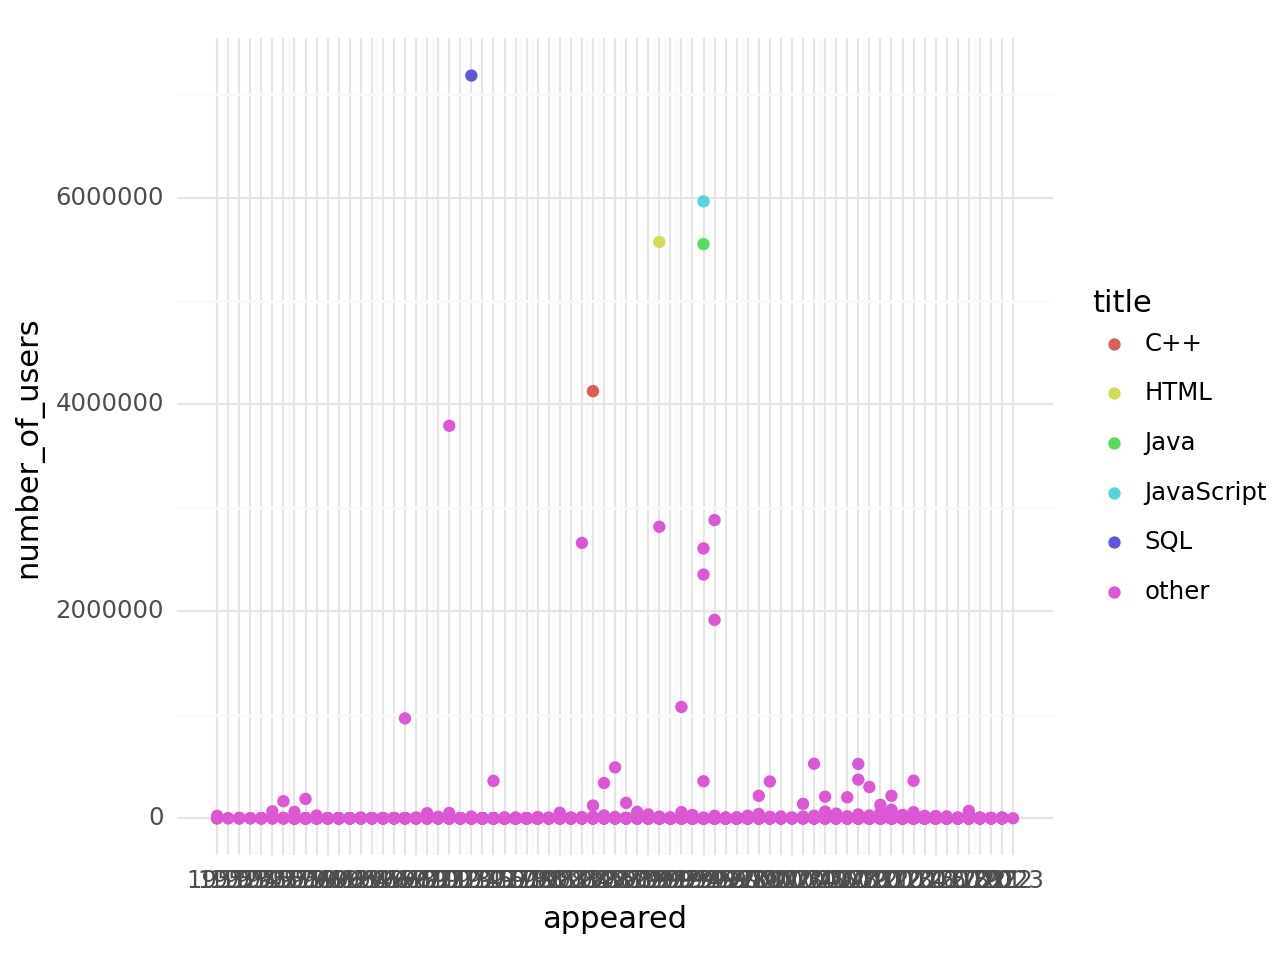

In [31]:
# Import necessary libraries
from plotnine import ggplot, aes, geom_point, scale_x_continuous, theme_minimal

# Create a ggplot object
plot = (
    ggplot(scattered_df, aes(x='appeared', y='number_of_users', color='title')) +
    geom_point() +
    scale_x_continuous(breaks=list(scattered_df['appeared'].unique()), labels=list(scattered_df['appeared'].unique())) +
    theme_minimal()
)

# Show the plot
print(plot)


In [20]:
# Import necessary libraries
from plotnine import ggplot, aes, geom_point, scale_x_continuous, theme_minimal

# Create a ggplot object
plot = (
    ggplot(scattered_df_gp, aes(x='appeared', y='number_of_users', color='title')) +
    geom_point() +
    scale_x_continuous(breaks=list(scattered_df_gp['appeared'].unique()), labels=list(scattered_df_gp['appeared'].unique())) +
    theme_minimal()
)

# Show the plot
print(plot)


KeyboardInterrupt: 

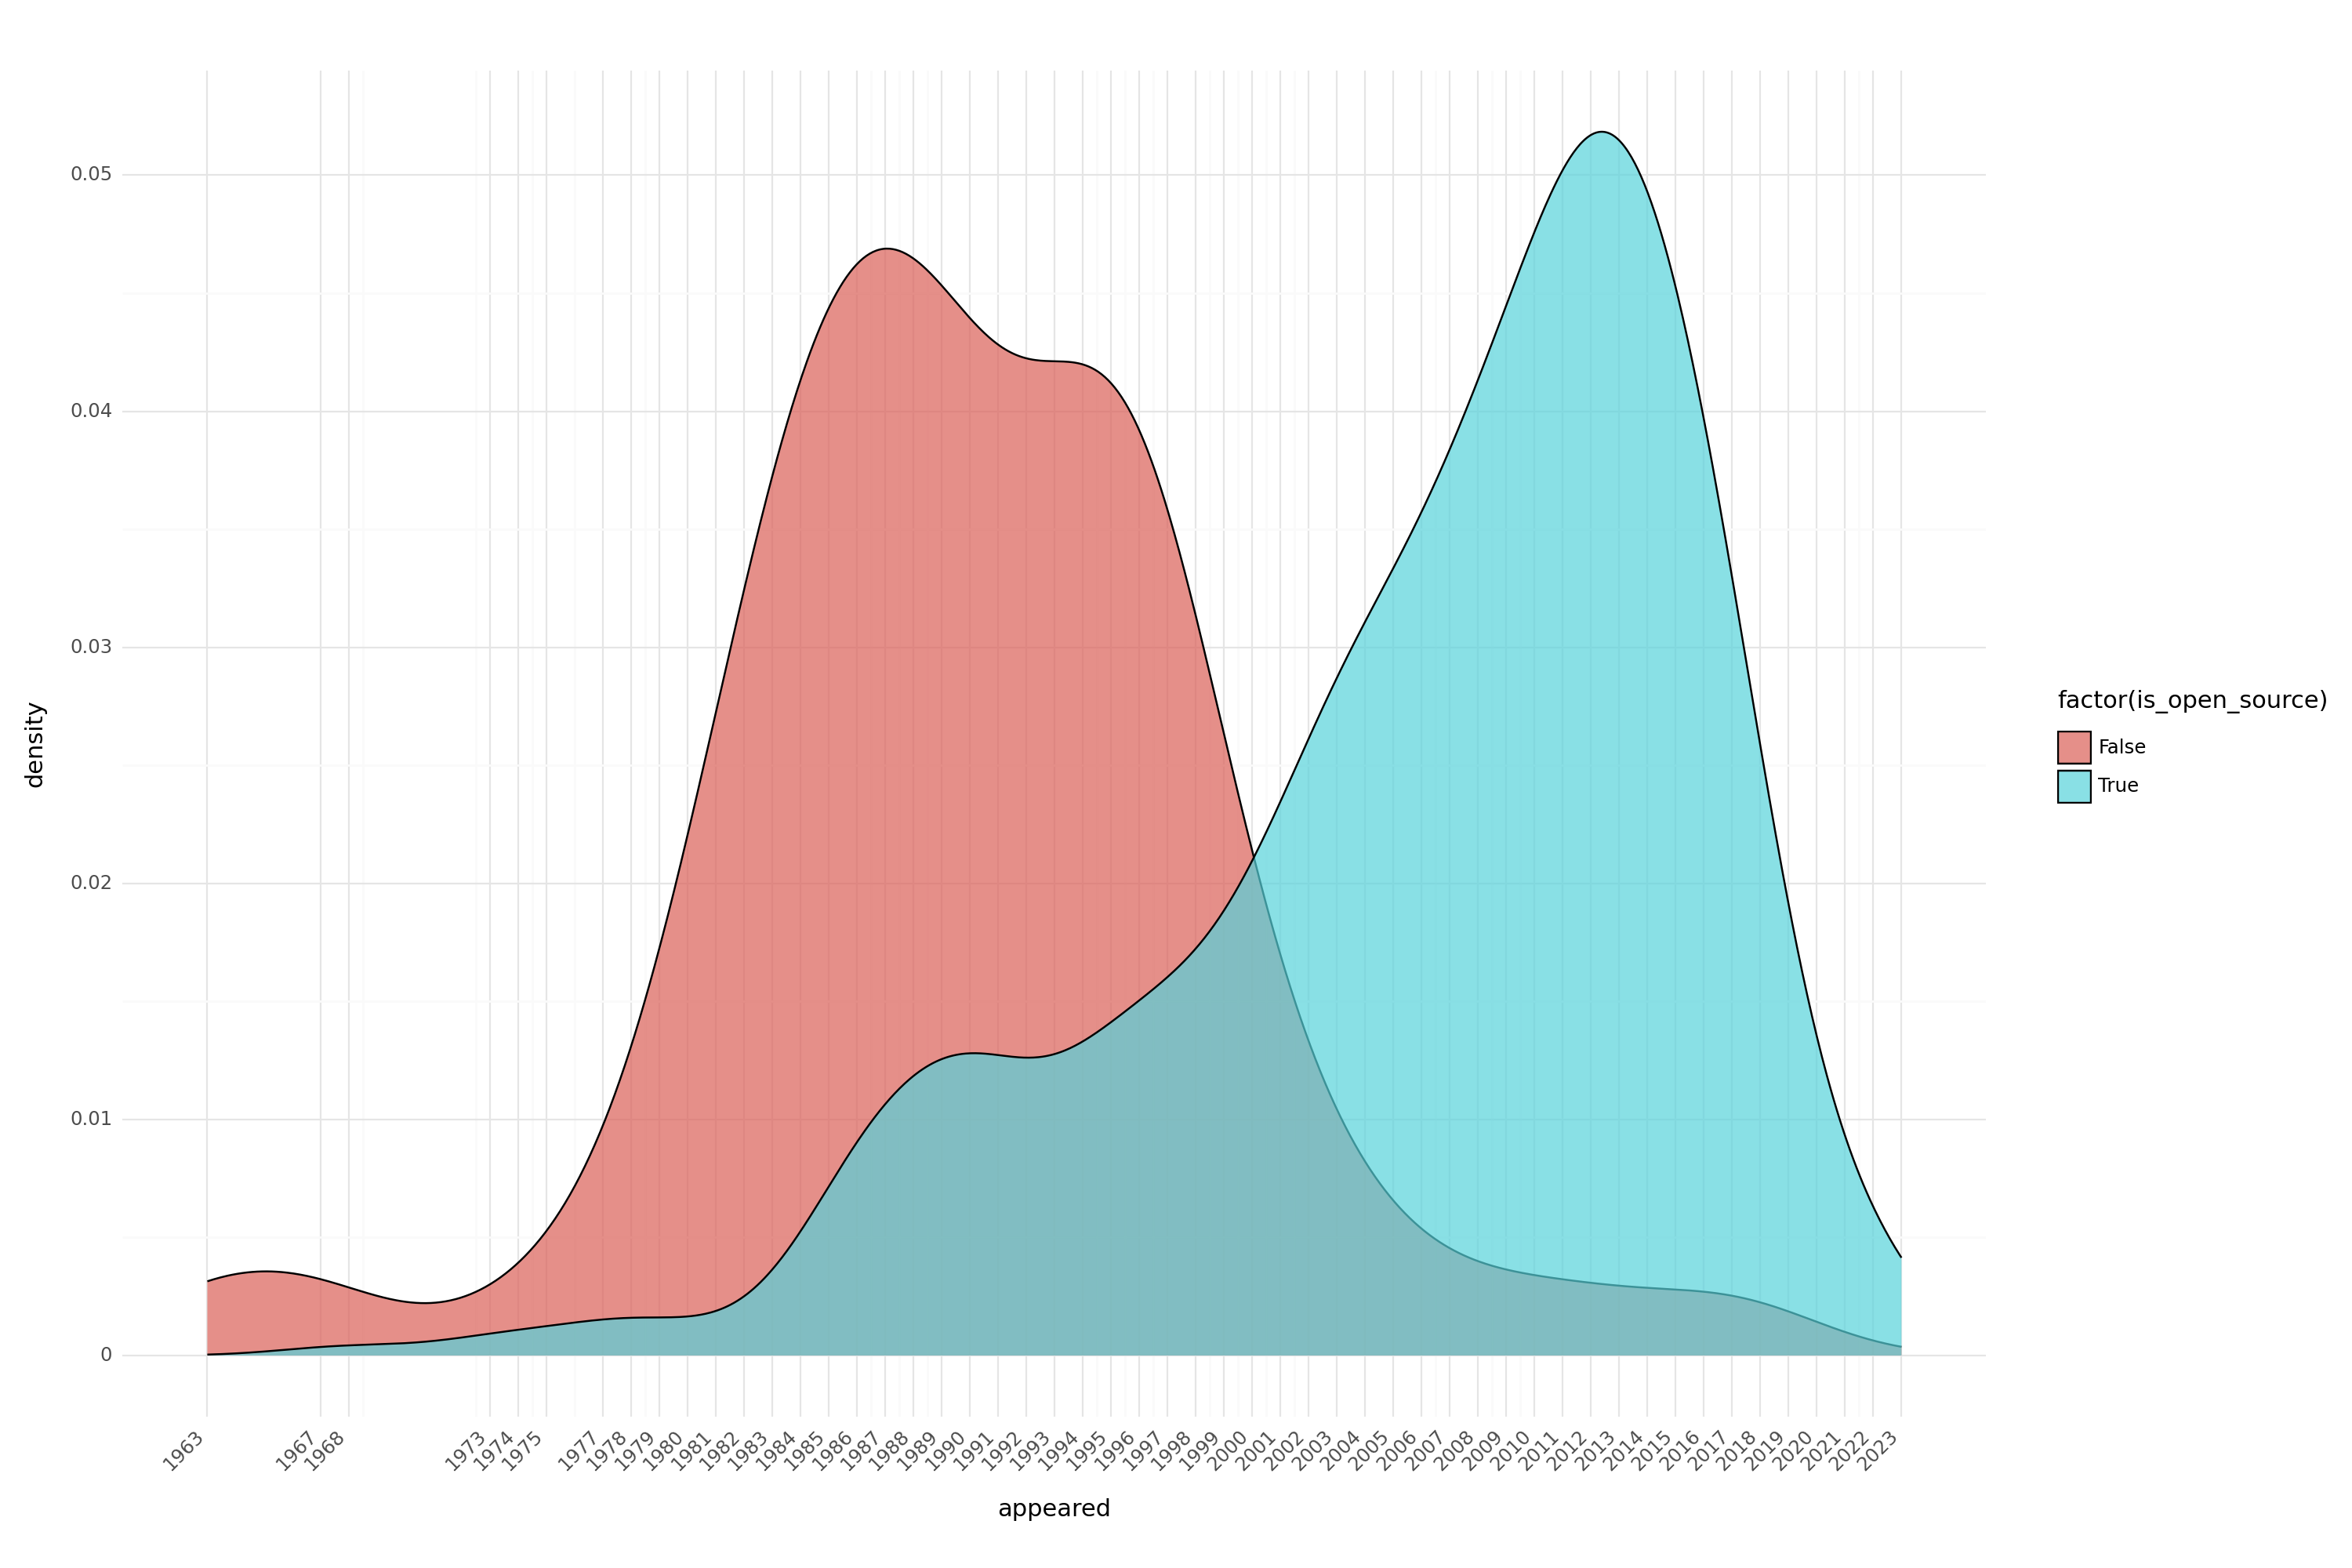

In [12]:
# Import necessary libraries
from plotnine import ggplot, aes, geom_density, scale_x_continuous, theme_minimal, theme

# Create a ggplot object
plot = (
    ggplot(scattered_df, aes(x='appeared', fill='factor(is_open_source)')) +
    geom_density(alpha=0.7) +  # Use alpha to control transparency
    scale_x_continuous(breaks=list(scattered_df['appeared'].unique()), labels=list(scattered_df['appeared'].unique())) +
    theme_minimal() +
    theme(figure_size=(15, 10), axis_text_x=element_text(angle=45, hjust=1))
)

# Show the plot
print(plot)


In [2]:
main_10_types_df=scattered_df.groupby(["type"]).agg({"number_of_jobs":"sum"}).reset_index()
main_10_types_df = main_10_types_df.sort_values(by="number_of_jobs",ascending=False).head(5)["type"]
main_10_types_df

26         protocol
24               pl
27    queryLanguage
33       textMarkup
5      dataNotation
Name: type, dtype: object

In [3]:
import numpy as np

scattered_df['type'] = np.where(~scattered_df['type'].isin(main_10_types_df), 'other', scattered_df['type'])
scattered_df['type'].unique()
scattered_df


appeared  number_of_jobs           type
0         1995           85206             pl
1         1995           63993             pl
2         1972           59919             pl
3         1991           46976             pl
4         1974          219617  queryLanguage
...        ...             ...            ...
4298      1976               0             pl
4299      1997               0             pl
4300      1955               0             pl
4301      1977               0             pl
4302      1999               0  queryLanguage

[4273 rows x 3 columns]

In [4]:
scattered_df_gp = scattered_df.groupby(["appeared","type"]).agg({"number_of_jobs":"sum"}).reset_index()
scattered_df_gp

appeared           type  number_of_jobs
0        1951             pl               0
1        1951  queryLanguage               0
2        1952          other               0
3        1952             pl               0
4        1953          other               0
..        ...            ...             ...
276      2022             pl               0
277      2022       protocol               0
278      2022  queryLanguage               0
279      2022     textMarkup               0
280      2023  queryLanguage               0

[281 rows x 3 columns]

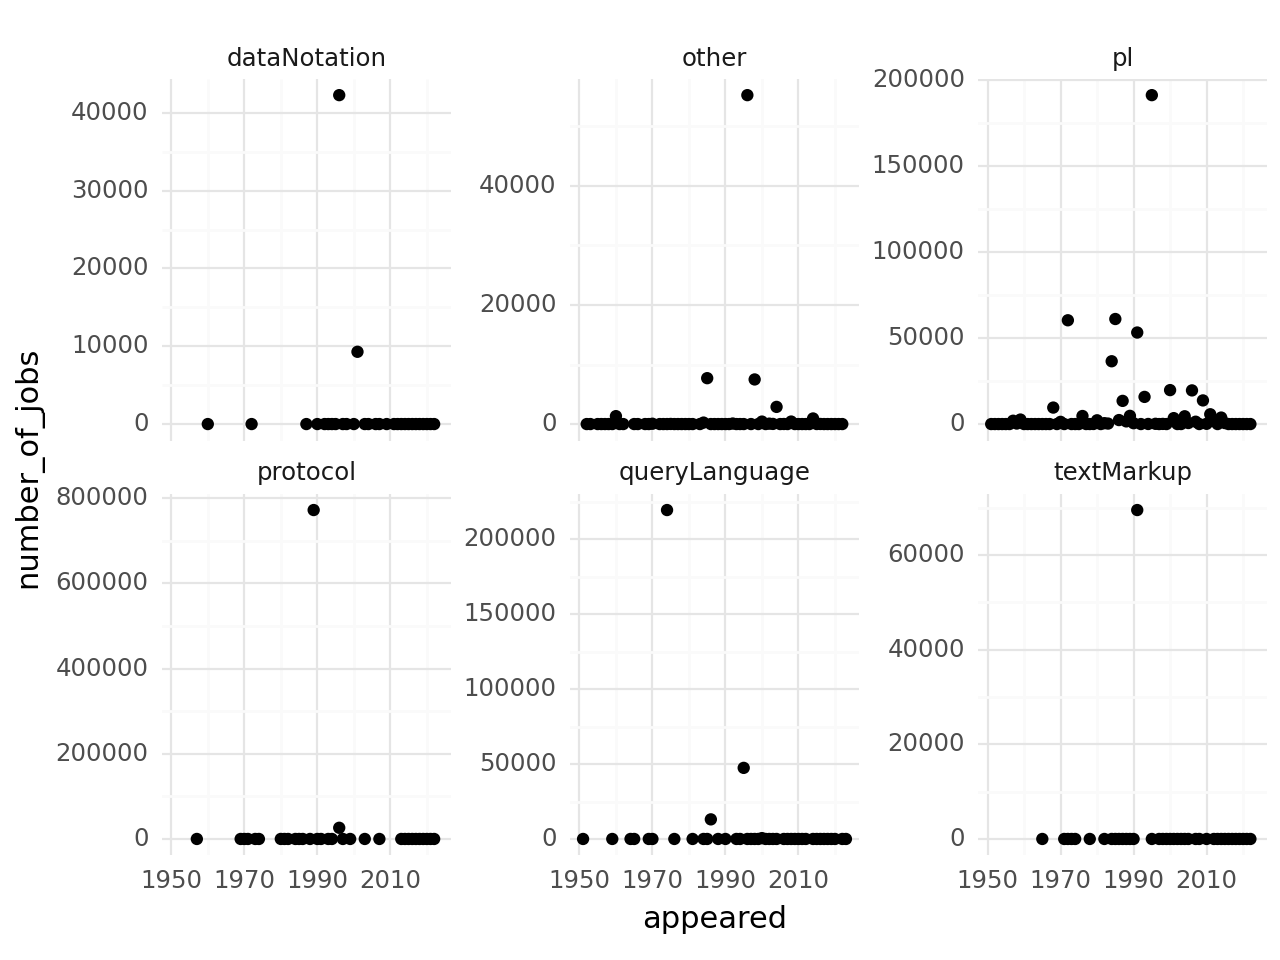

In [5]:
# Import necessary libraries
from plotnine import ggplot, aes, geom_point, facet_wrap, theme_minimal

# Create scatter plots with facets
scatter_plots = (
    ggplot(scattered_df_gp, aes(x='appeared', y='number_of_jobs')) +
    geom_point() +
    facet_wrap('~type', scales='free_y') +  # Facet by 'type'
    theme_minimal()  # Optional: Customize the theme
)

# Show the plot
print(scatter_plots)


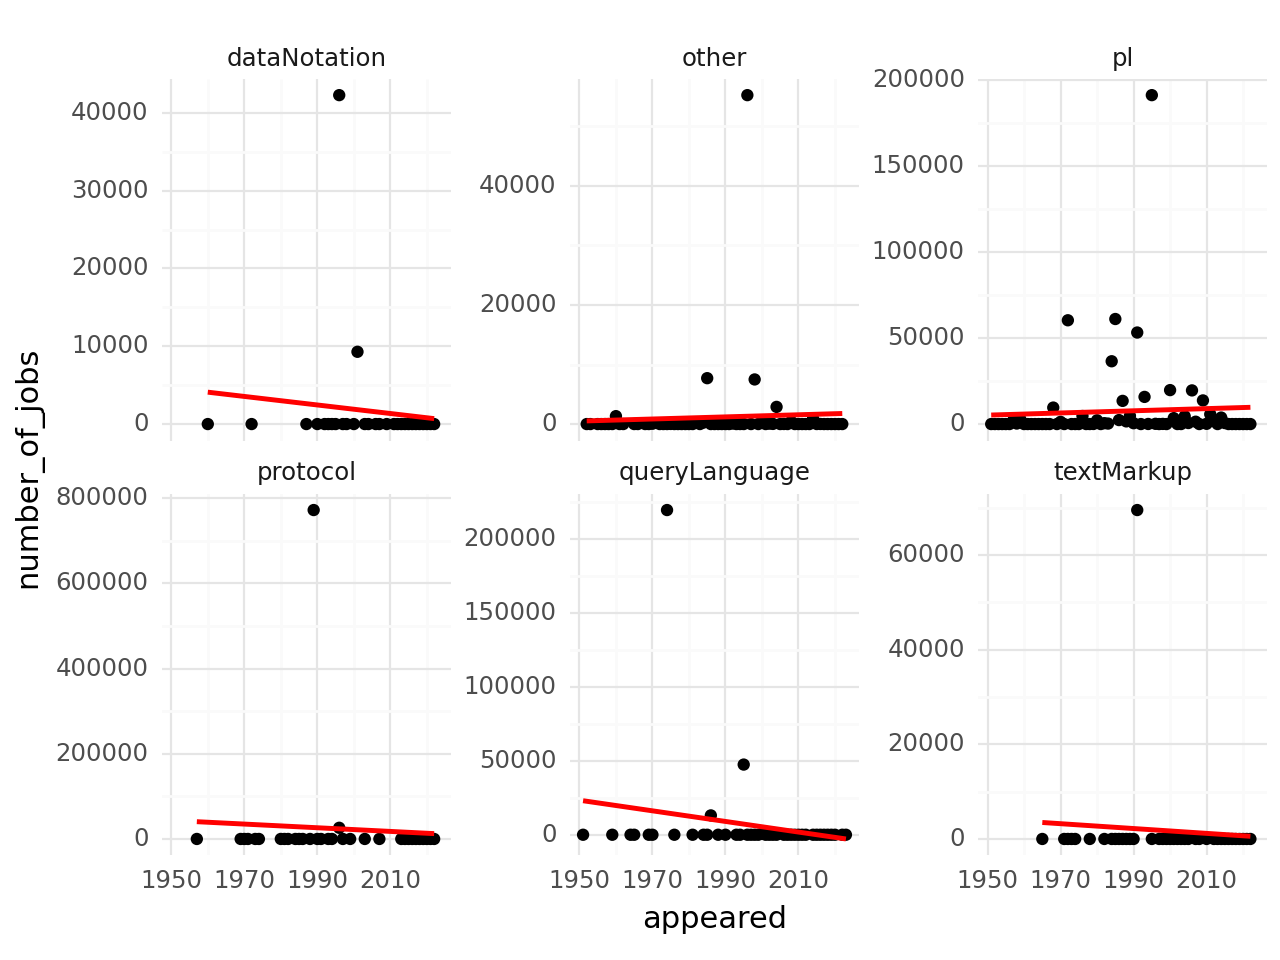

In [6]:
# Import necessary libraries
from plotnine import ggplot, aes, geom_point, facet_wrap, stat_smooth, theme_minimal

# Create scatter plots with facets and fitted lines
scatter_plots_with_fitted_lines = (
    ggplot(scattered_df_gp, aes(x='appeared', y='number_of_jobs')) +
    geom_point() +
    stat_smooth(method='lm', se=False, color='red') +  # Add a fitted line (linear regression)
    facet_wrap('~type', scales='free_y') +  # Facet by 'type'
    theme_minimal()  # Optional: Customize the theme
)

# Show the plot
print(scatter_plots_with_fitted_lines)


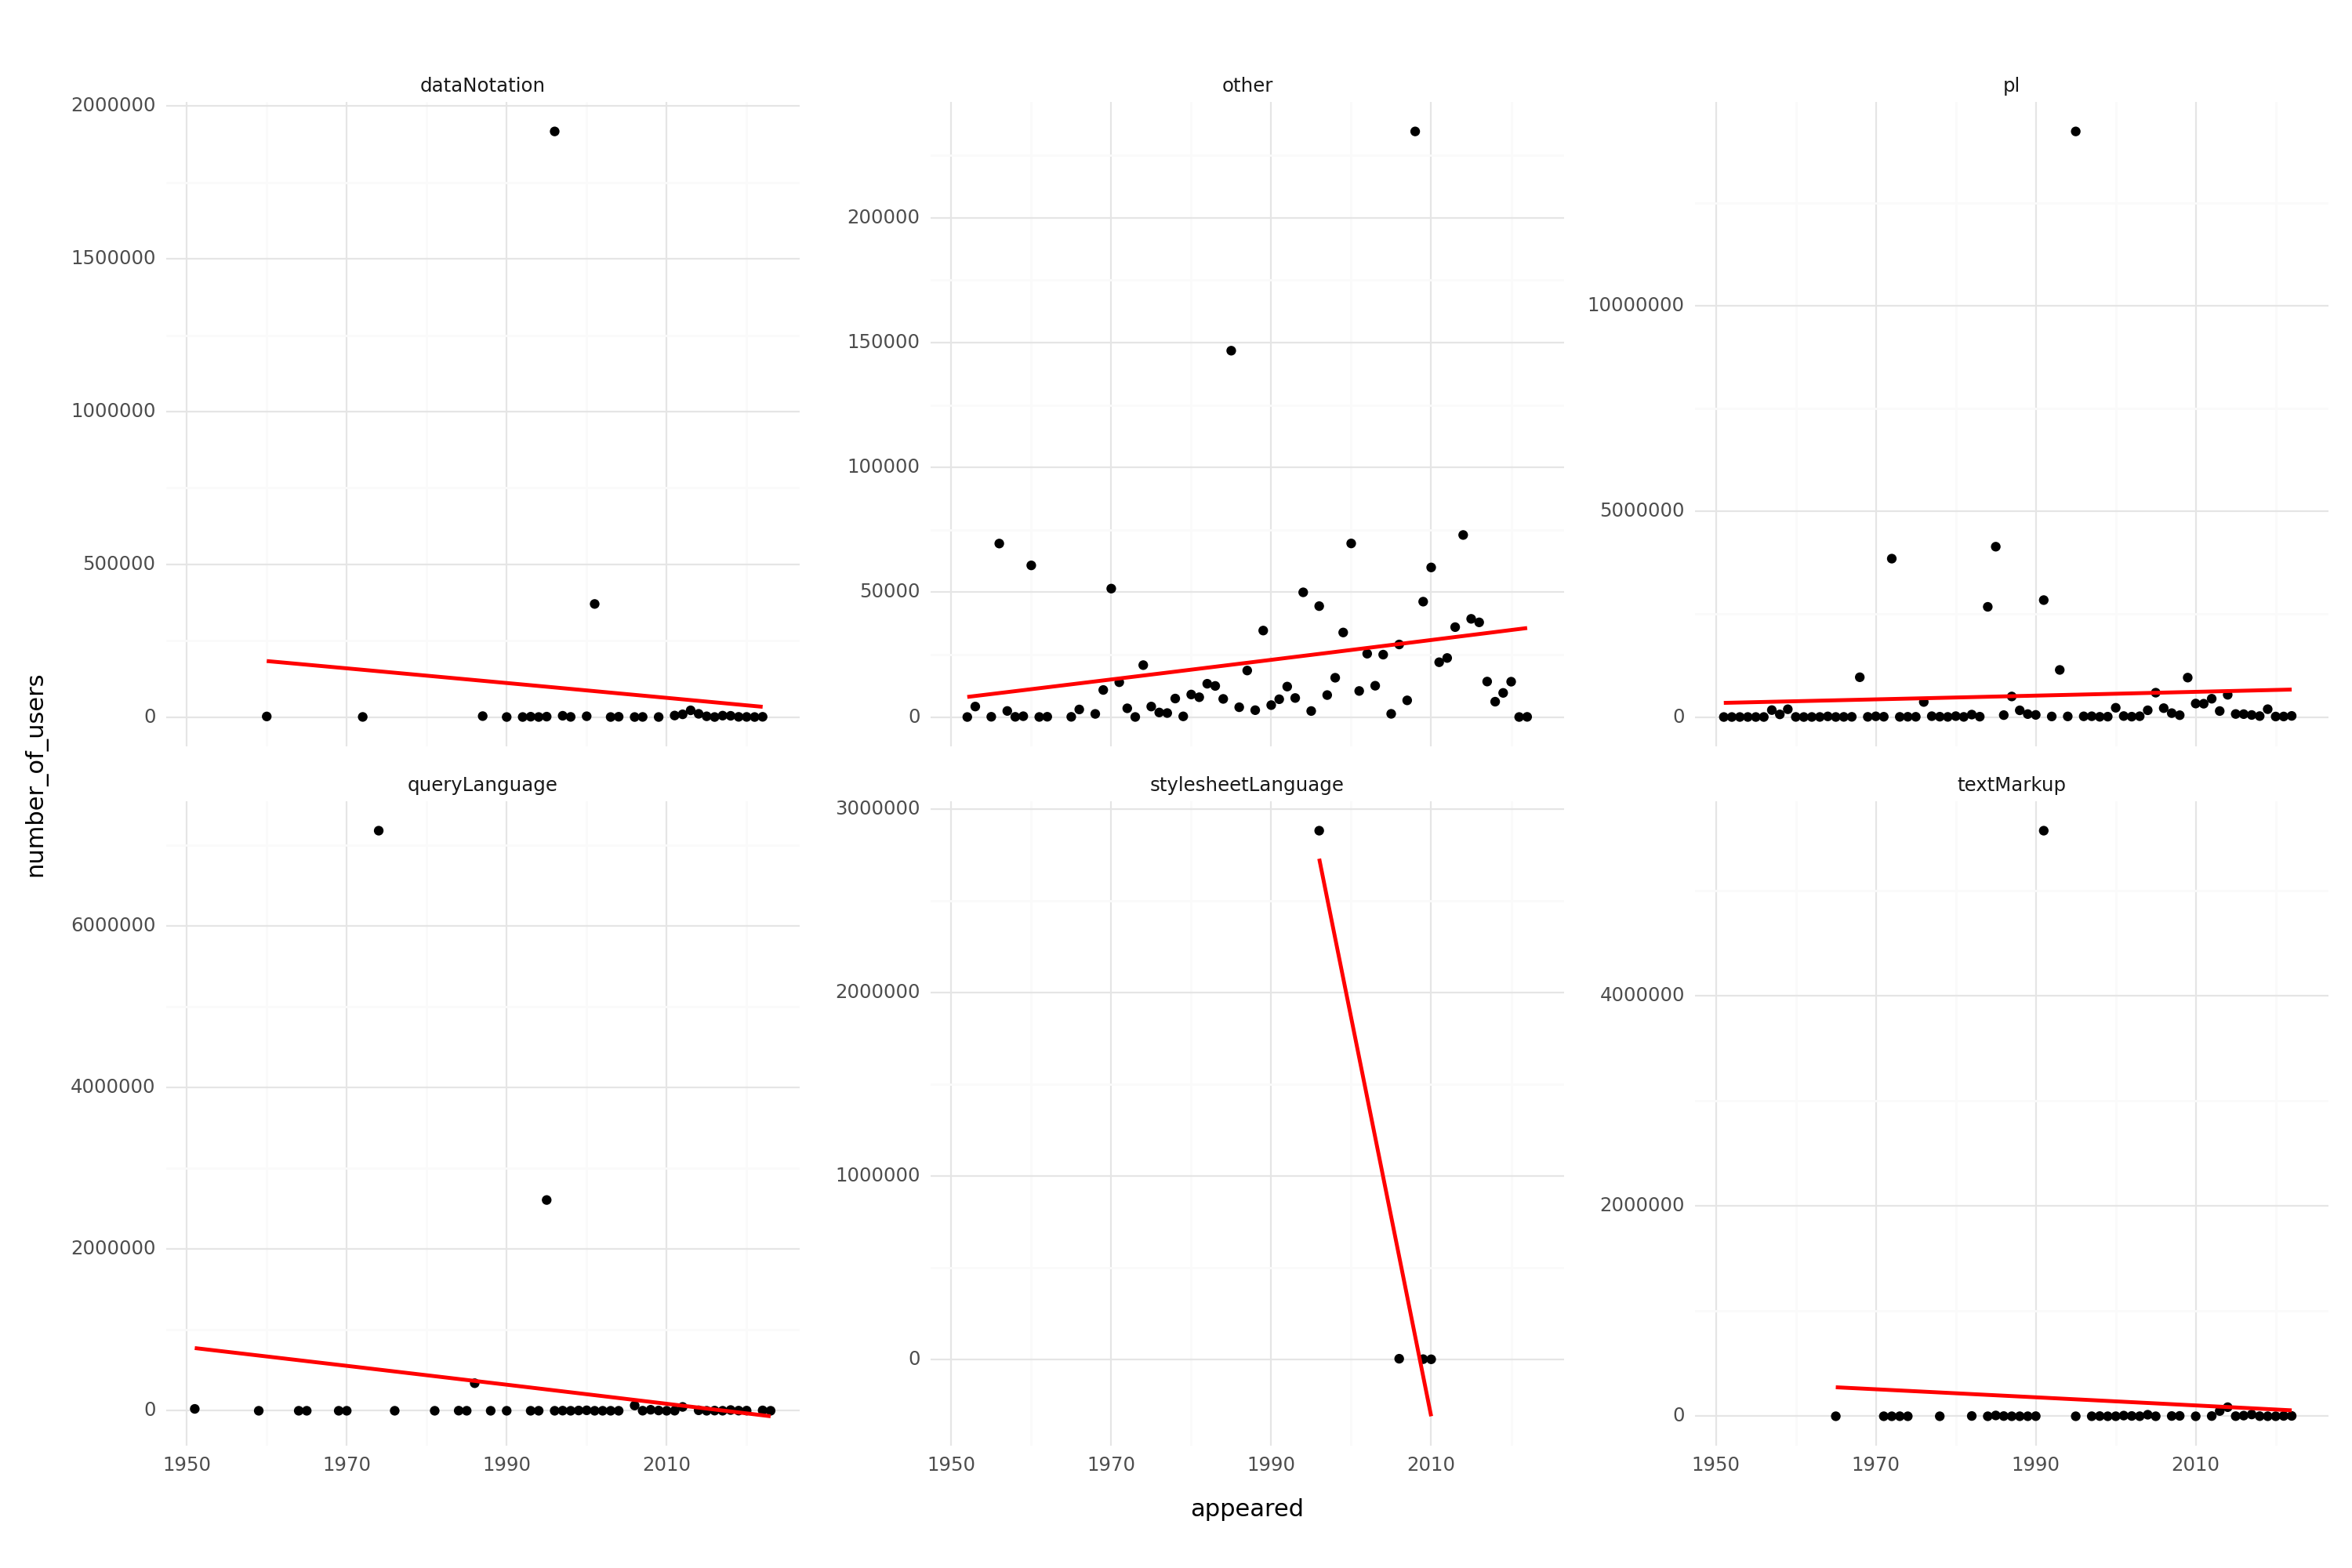

In [37]:
# Import necessary libraries
from plotnine import ggplot, aes, geom_point, facet_wrap, stat_smooth, theme_minimal

# Create scatter plots with facets and curved fitted lines
scatter_plots_with_curved_lines = (
    ggplot(scattered_df_gp, aes(x='appeared', y='number_of_jobs')) +
    geom_point() +
    stat_smooth(method='lm', formula='y ~ I(x**2)', se=False, color='red') +  # Add a polynomial fitted line (degree=2)
    facet_wrap('~type', scales='free_y') +  # Facet by 'type'
    theme_minimal()  +# Optional: Customize the theme
   theme(figure_size=(15, 10))
)

# Show the plot
print(scatter_plots_with_curved_lines)


In [38]:
# Import necessary libraries
from plotnine import ggplot, aes, geom_point, facet_wrap, stat_smooth, theme_minimal

# Create scatter plots with facets and curved fitted lines
scatter_plots_with_curved_lines = (
    ggplot(scattered_df_gp, aes(x='appeared', y='number_of_users')) +
    geom_point() +
    stat_smooth(method='loess', se=False, color='red') +  # Add a loess fitted line
    facet_wrap('~type', scales='free_y') +  # Facet by 'type'
    theme_minimal()  # Optional: Customize the theme
)

# Show the plot
print(scatter_plots_with_curved_lines)


ValueError: b'There are other near singularities as well. 16.565'

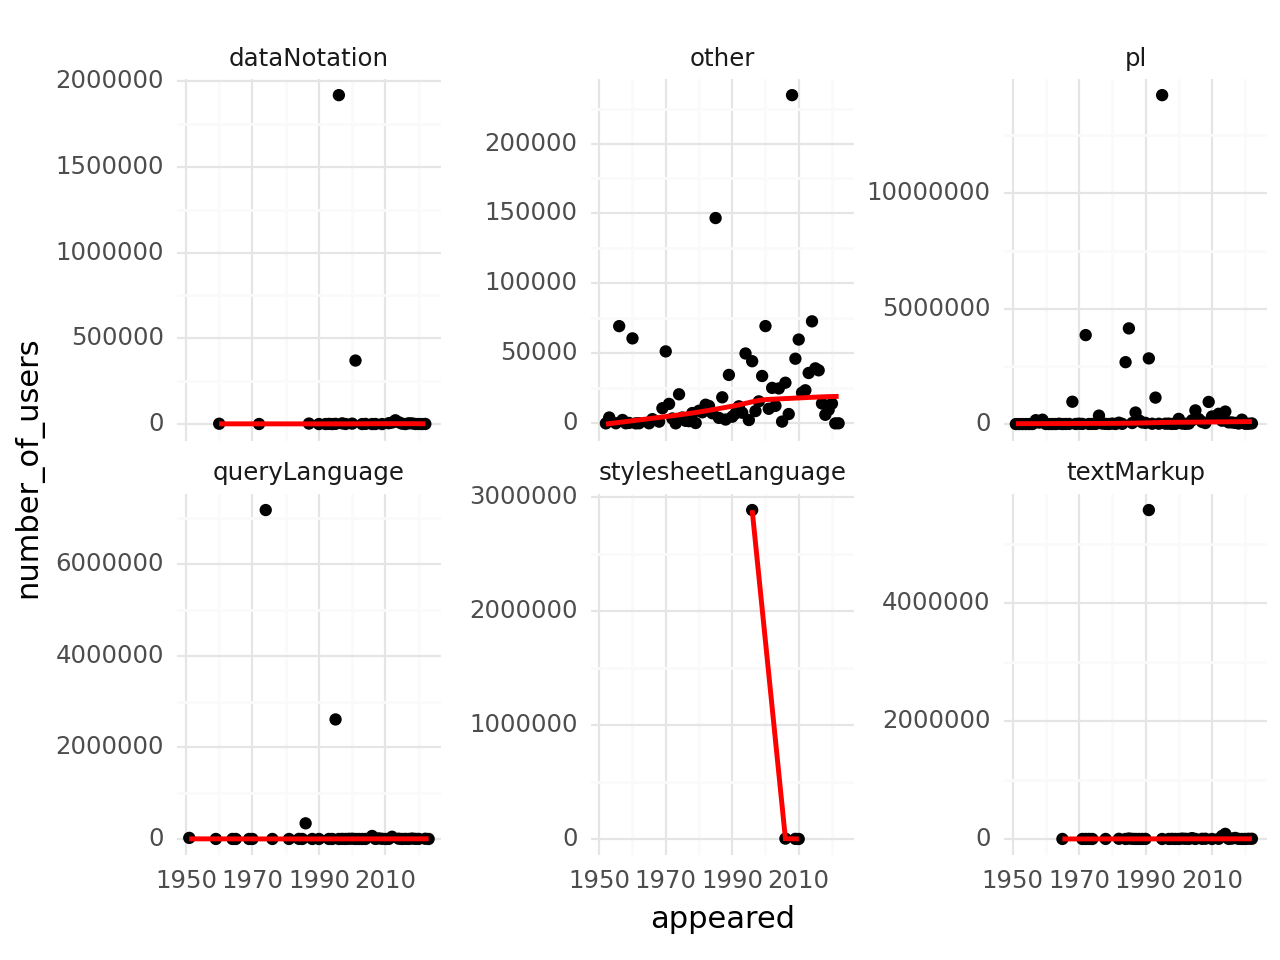

In [39]:
# Import necessary libraries
from plotnine import ggplot, aes, geom_point, facet_wrap, stat_smooth, theme_minimal

# Create scatter plots with facets and curved fitted lines
scatter_plots_with_curved_lines = (
    ggplot(scattered_df_gp, aes(x='appeared', y='number_of_users')) +
    geom_point() +
    stat_smooth(method='lowess', se=False, color='red') +  # Add a lowess fitted line
    facet_wrap('~type', scales='free_y') +  # Facet by 'type'
    theme_minimal()  # Optional: Customize the theme
)

# Show the plot
print(scatter_plots_with_curved_lines)
